# Build a classifier to determine whether a news article is fake or real

You are a new an AI Engineer, task with building an AI/ML classifier that helps politicians determine whether news articles trending on social media are fake or real.

Follow an approach similar to what we took in class, which looks something like the below.

- Preprocess the data
    - Remove stop words
    - Remove unwanted characters
    - Stemining
    - ...
- Split data between training and test sets
- Modeling strategies
    - Bag of words modeling including TF-IDF using traditional ML
    - LST modeling
    - Transformer modeling
    
Recommend the best model based on relevant metrics of your choice. Be sure to explain your rational, including relevant visualizations at every steps of your work

Minimal starter code has been provided below     

In [1]:
import pandas as pd

# Load the  Data

In [47]:
Fake=pd.read_csv("./Fake.csv")
true=pd.read_csv("./True.csv")

- Give the fake news label 0 :

In [48]:
Fake['label']=0

In [20]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [49]:
true['label']=1

In [22]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [50]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [24]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [11]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [51]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [13]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [14]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [53]:
News.duplicated().sum()

0

In [52]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [54]:
total_false = len(News[News['label'] == 0])
total_true = len(News[News['label'] == 1])
print(total_false)
print(total_true)

17455
21192


### Preprocess the data

### Remove Stopwords

In [2]:
!pip install --quiet spacy

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [55]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Remove unwanted characters
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip().lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation, and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in string.punctuation]

    return ' '.join(filtered_tokens)


News['text'] = News['text'].apply(preprocess_text)

In [31]:
print(News.head())

                                                text  label
0  donald trump wish american happy new year leav...      0
1  house intelligence committee chairman devin nu...      0
2  friday revealed former milwaukee sheriff david...      0
3  christmas day donald trump announced would bac...      0
4  pope francis used annual christmas day message...      0


# Split data

In [56]:
from sklearn.model_selection import train_test_split

X = News['text']
y = News['label']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30917,)
(7730,)
(30917,)
(7730,)


In [34]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

37684    sydney reuters ninth australian lawmaker quit ...
41071    hanoi reuters least 54 people died 39 went mis...
33108    washington reuters president barack obama meet...
43531    brasilia reuters u president donald trump invi...
2269     donald trump ruined remaining chance get suppo...
Name: text, dtype: object
37684    1
41071    1
33108    1
43531    1
2269     0
Name: label, dtype: int64
42133    september 29 corrected fix date election parag...
29371    reuters u president donald trump said friday a...
44520    pristina reuters kosovo center right coalition...
27618    washington reuters president donald trump frid...
4156     pennsylvania man apparently failed basic biolo...
Name: text, dtype: object
42133    1
29371    1
44520    1
27618    1
4156     0
Name: label, dtype: int64


# Modeling Strategies

## Bag of words modeling including TF-IDF using traditional ML

Bag of Words Model
Accuracy: 0.9521345407503234
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3500
           1       0.96      0.95      0.96      4230

    accuracy                           0.95      7730
   macro avg       0.95      0.95      0.95      7730
weighted avg       0.95      0.95      0.95      7730



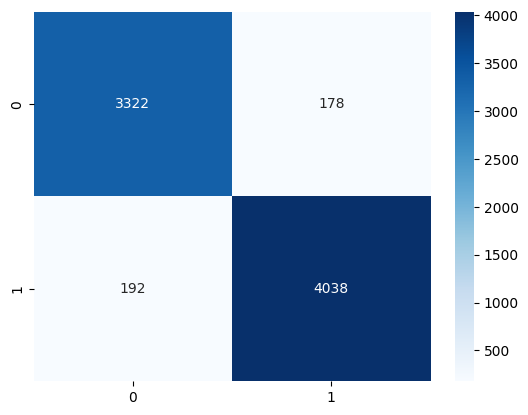

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bag of Words
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate
print("Bag of Words Model")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))
sns.heatmap(confusion_matrix(y_test, y_pred_bow), annot=True, fmt='d', cmap='Blues')
plt.show()

In [37]:
print(X_train.shape)
print(X_test.shape)

(38647, 113563)
(38647, 113563)


## TF-IDF

TF-IDF Model
Accuracy: 0.9366106080206986
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3500
           1       0.92      0.97      0.94      4230

    accuracy                           0.94      7730
   macro avg       0.94      0.93      0.94      7730
weighted avg       0.94      0.94      0.94      7730



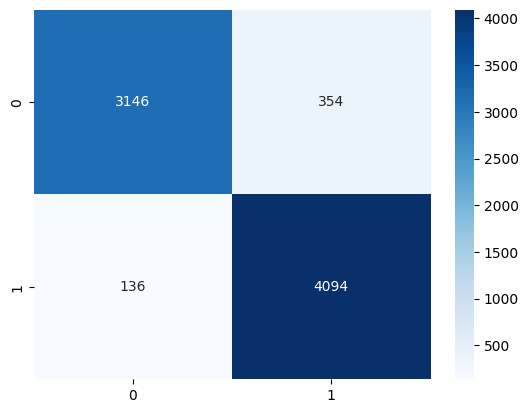

In [60]:
# TF-IDF
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

tfidf_pipeline.fit(X_train, y_train)
y_pred_tfidf = tfidf_pipeline.predict(X_test)

# Evaluate
print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', cmap='Blues')
plt.show()


## LST Model

In [62]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))

# Evaluate
score = model.evaluate(X_test_pad, y_test_cat)
print("LSTM Model")
print("Test Accuracy:", score[1])

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


Epoch 1/5
484/484 [==============================] - 137s 272ms/step - loss: 0.1155 - accuracy: 0.9562 - val_loss: 0.0606 - val_accuracy: 0.9796
Epoch 2/5
484/484 [==============================] - 119s 245ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0596 - val_accuracy: 0.9798
Epoch 3/5
484/484 [==============================] - 119s 245ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0681 - val_accuracy: 0.9801
Epoch 4/5
484/484 [==============================] - 115s 238ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0865 - val_accuracy: 0.9762
Epoch 5/5
264/484 [===============>..............] - ETA: 51s - loss: 0.0114 - accuracy: 0.9965

KeyboardInterrupt: 

## Transformer Model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
X_train_bert = bert_tokenizer(X_train.tolist(), max_length=100, padding=True, truncation=True, return_tensors="tf")
X_test_bert = bert_tokenizer(X_test.tolist(), max_length=100, padding=True, truncation=True, return_tensors="tf")

# Convert labels to numpy arrays
y_train_bert = np.array(y_train)
y_test_bert = np.array(y_test)

# Load BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile the model
optimizer = Adam(learning_rate=2e-5, epsilon=1e-8)
bert_model.compile(optimizer=optimizer, loss=bert_model.compute_loss, metrics=['accuracy'])

# Train the model
bert_history = bert_model.fit(
    [X_train_bert['input_ids'], X_train_bert['attention_mask']],
    y_train_bert,
    epochs=2,
    batch_size=16,
    validation_data=([X_test_bert['input_ids'], X_test_bert['attention_mask']], y_test_bert)
)

# Evaluate
bert_eval = bert_model.evaluate([X_test_bert['input_ids'], X_test_bert['attention_mask']], y_test_bert)
print("BERT Model")
print("Test Accuracy:", bert_eval[1])

# Plot training history
plt.plot(bert_history.history['accuracy'], label='train accuracy')
plt.plot(bert_history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


# Evaluation over independent dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("GonzaloA/fake_news")